# Data Evaluation

In [ ]:
'''
Let's load the dataset and perform an initial examination to better
understand its structure, missing values, and general characteristics.
'''

import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import joblib

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_file_path = "/content/drive/MyDrive/classification model/lab2_oil_gas_field_construction_data.csv"


In [ ]:
data = pd.read_csv(data_file_path, low_memory=False)

In [ ]:
import missingno as msno

Text(0.5, 1.0, 'Distribution of Missing Values')

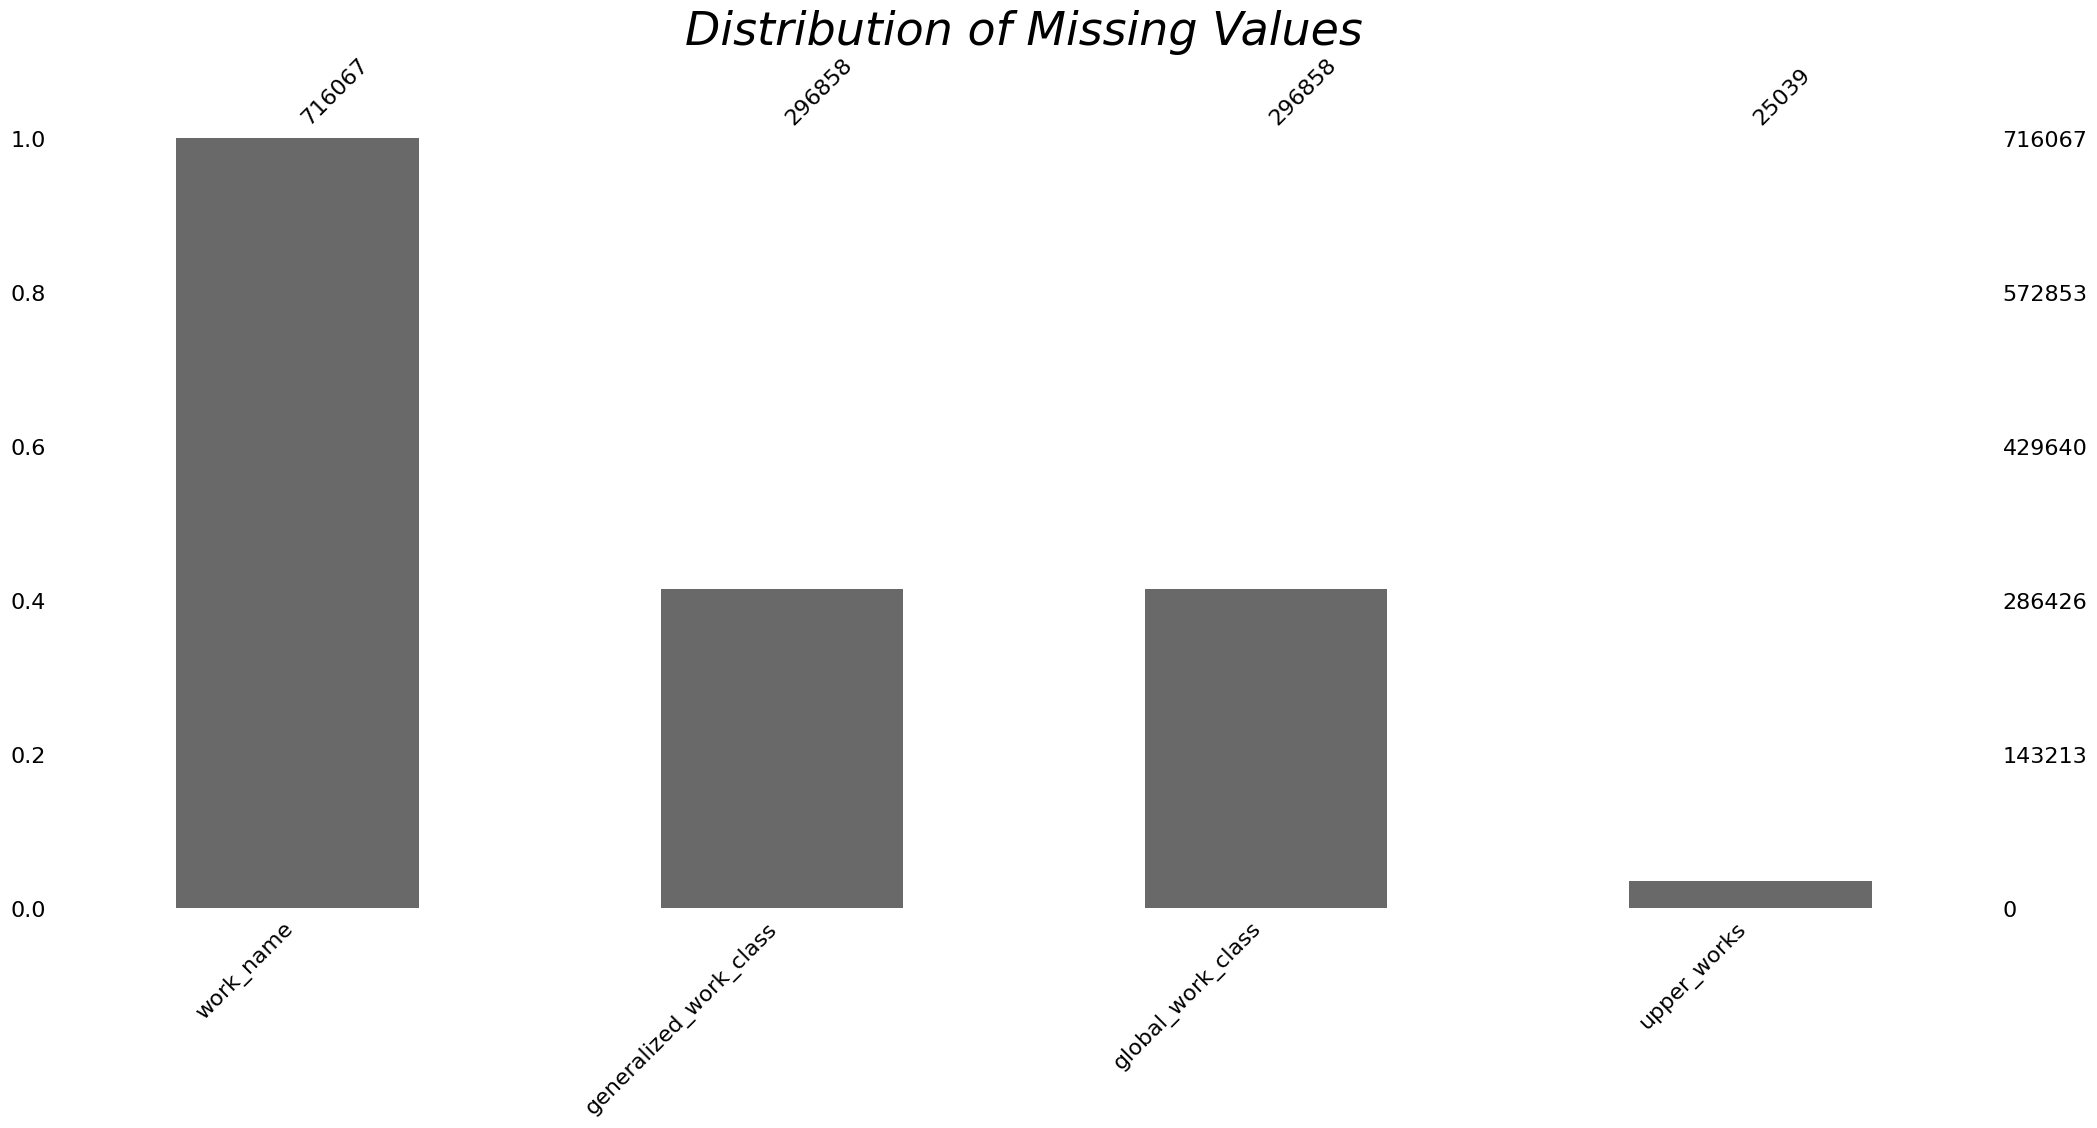

In [ ]:
msno.bar(data)
plt.title('Distribution of Missing Values', fontsize=33, fontstyle='oblique')

In [ ]:
# Display basic information and the first few rows of the dataset
data_info = data.info()
data_head = data.head()
data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716067 entries, 0 to 716066
Data columns (total 4 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   work_name               716067 non-null  object
 1   generalized_work_class  296858 non-null  object
 2   global_work_class       296858 non-null  object
 3   upper_works             25039 non-null   object
dtypes: object(4)
memory usage: 21.9+ MB


In [ ]:
data_head

,work_name,generalized_work_class,global_work_class,upper_works
0,монтаж ограждения основания блоков управления са,NaN,NaN,NaN
1,монтаж стоек,NaN,NaN,"('Подготовка свай', 'Монтаж ограждения')"
2,монтаж трубопровода г16/1 газ с предохранитель...,NaN,NaN,NaN
3,монтад лестниц,Монтаж лестниц,Строительство зданий,NaN
4,монтаж площадок,NaN,NaN,NaN


In [ ]:
 # exploratory data analysis to understand the distribution of classes and characteristics of text data.

 # Count of each class in 'generalized_work_class'
gen_work_class_dist = data['generalized_work_class'].value_counts()

# Count of each class in 'global_work_class'
global_work_class_dist = data['global_work_class'].value_counts()

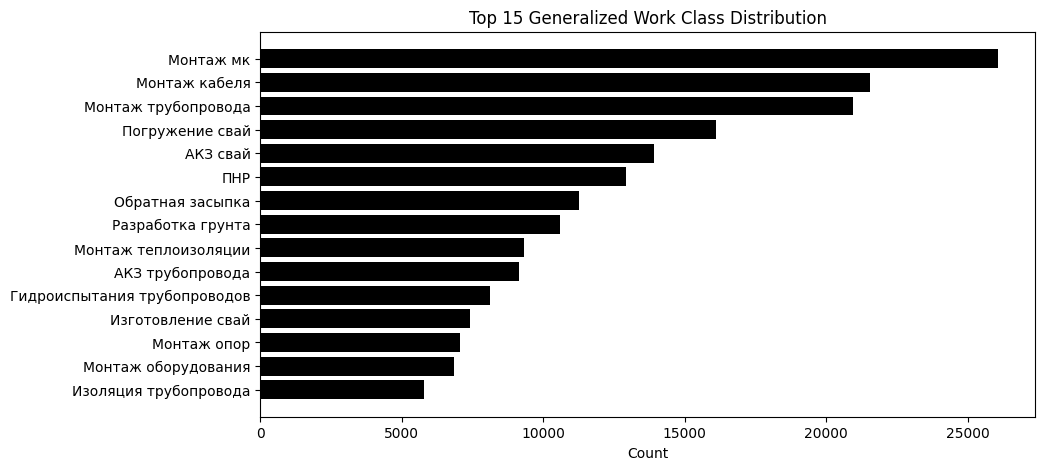

In [ ]:
# Visualizing the distribution of 'generalized_work_class'
plt.figure(figsize=(10,5))
plt.barh(gen_work_class_dist.index[:15], gen_work_class_dist.values[:15], color='black')
plt.xlabel('Count')
plt.title('Top 15 Generalized Work Class Distribution')
plt.gca().invert_yaxis()
plt.show()

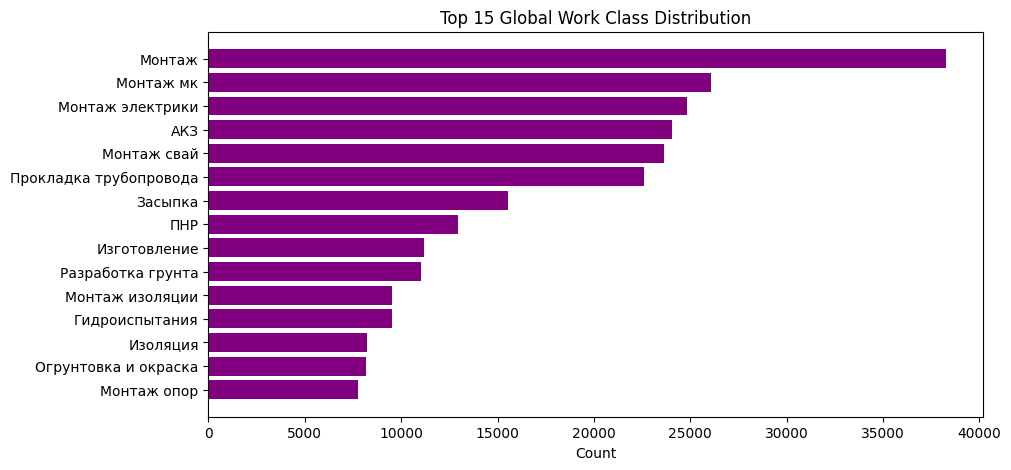

In [ ]:
# Visualizing the distribution of 'global_work_class'
plt.figure(figsize=(10,5))
plt.barh(global_work_class_dist.index[:15], global_work_class_dist.values[:15], color='purple')
plt.xlabel('Count')
plt.title('Top 15 Global Work Class Distribution')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# Return the top classes for both 'generalized_work_class' and 'global_work_class'
gen_work_class_dist.head(15)

Монтаж мк                       26081
Монтаж кабеля                   21547
Монтаж трубопровода             20943
Погружение свай                 16096
АКЗ свай                        13918
ПНР                             12937
Обратная засыпка                11258
Разработка грунта               10577
Монтаж теплоизоляции             9319
АКЗ трубопровода                 9154
Гидроиспытания трубопроводов     8132
Изготовление свай                7399
Монтаж опор                      7052
Монтаж оборудования              6847
Изоляция трубопровода            5794
Name: generalized_work_class, dtype: int64

In [ ]:
global_work_class_dist.head(15)

Монтаж                    38286
Монтаж мк                 26081
Монтаж электрики          24826
АКЗ                       24045
Монтаж свай               23612
Прокладка трубопровода    22604
Засыпка                   15536
ПНР                       12937
Изготовление              11185
Разработка грунта         11036
Монтаж изоляции            9508
Гидроиспытания             9508
Изоляция                   8228
Огрунтовка и окраска       8165
Монтаж опор                7762
Name: global_work_class, dtype: int64

In [ ]:
# Checking the number of missing values in each column
missing_values = data.isnull().sum()
missing_values

work_name                      0
generalized_work_class    419209
global_work_class         419209
upper_works               691028
dtype: int64

In [ ]:
# Checking the number of unique values in 'generalized_work_class' and 'global_work_class'
unique_generalized = data['generalized_work_class'].nunique()
unique_global = data['global_work_class'].nunique()


In [ ]:
unique_generalized

207

In [ ]:
 unique_global

56

> There are no missing values in the work_name column.

> The generalized_work_class and global_work_class columns each have 419,209 missing values.

> The upper_works column has 691,028 missing values.

> There are 207 unique values in the generalized_work_class column and 56 unique values in the global_work_class column.

# Given that there are a significant number of typos and grammatical errors in the task names, as mentioned in the notes, using Natural Language Processing (NLP) techniques specifically tailored for the Russian language will be crucial. We'll need to preprocess the text data to handle these issues

In [ ]:
#Tokenization

from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import nltk

In [ ]:
# Download the Russian stop words from nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Get the list of Russian stop words
stop_words = set(stopwords.words('russian'))

# Handle missing values in 'processed_upper_works' column by replacing NaN with 'Unknown'

In [ ]:
# Handle missing values in 'upper_works' column by replacing NaN with 'Unknown'
data['upper_works'].fillna('Unknown', inplace=True)

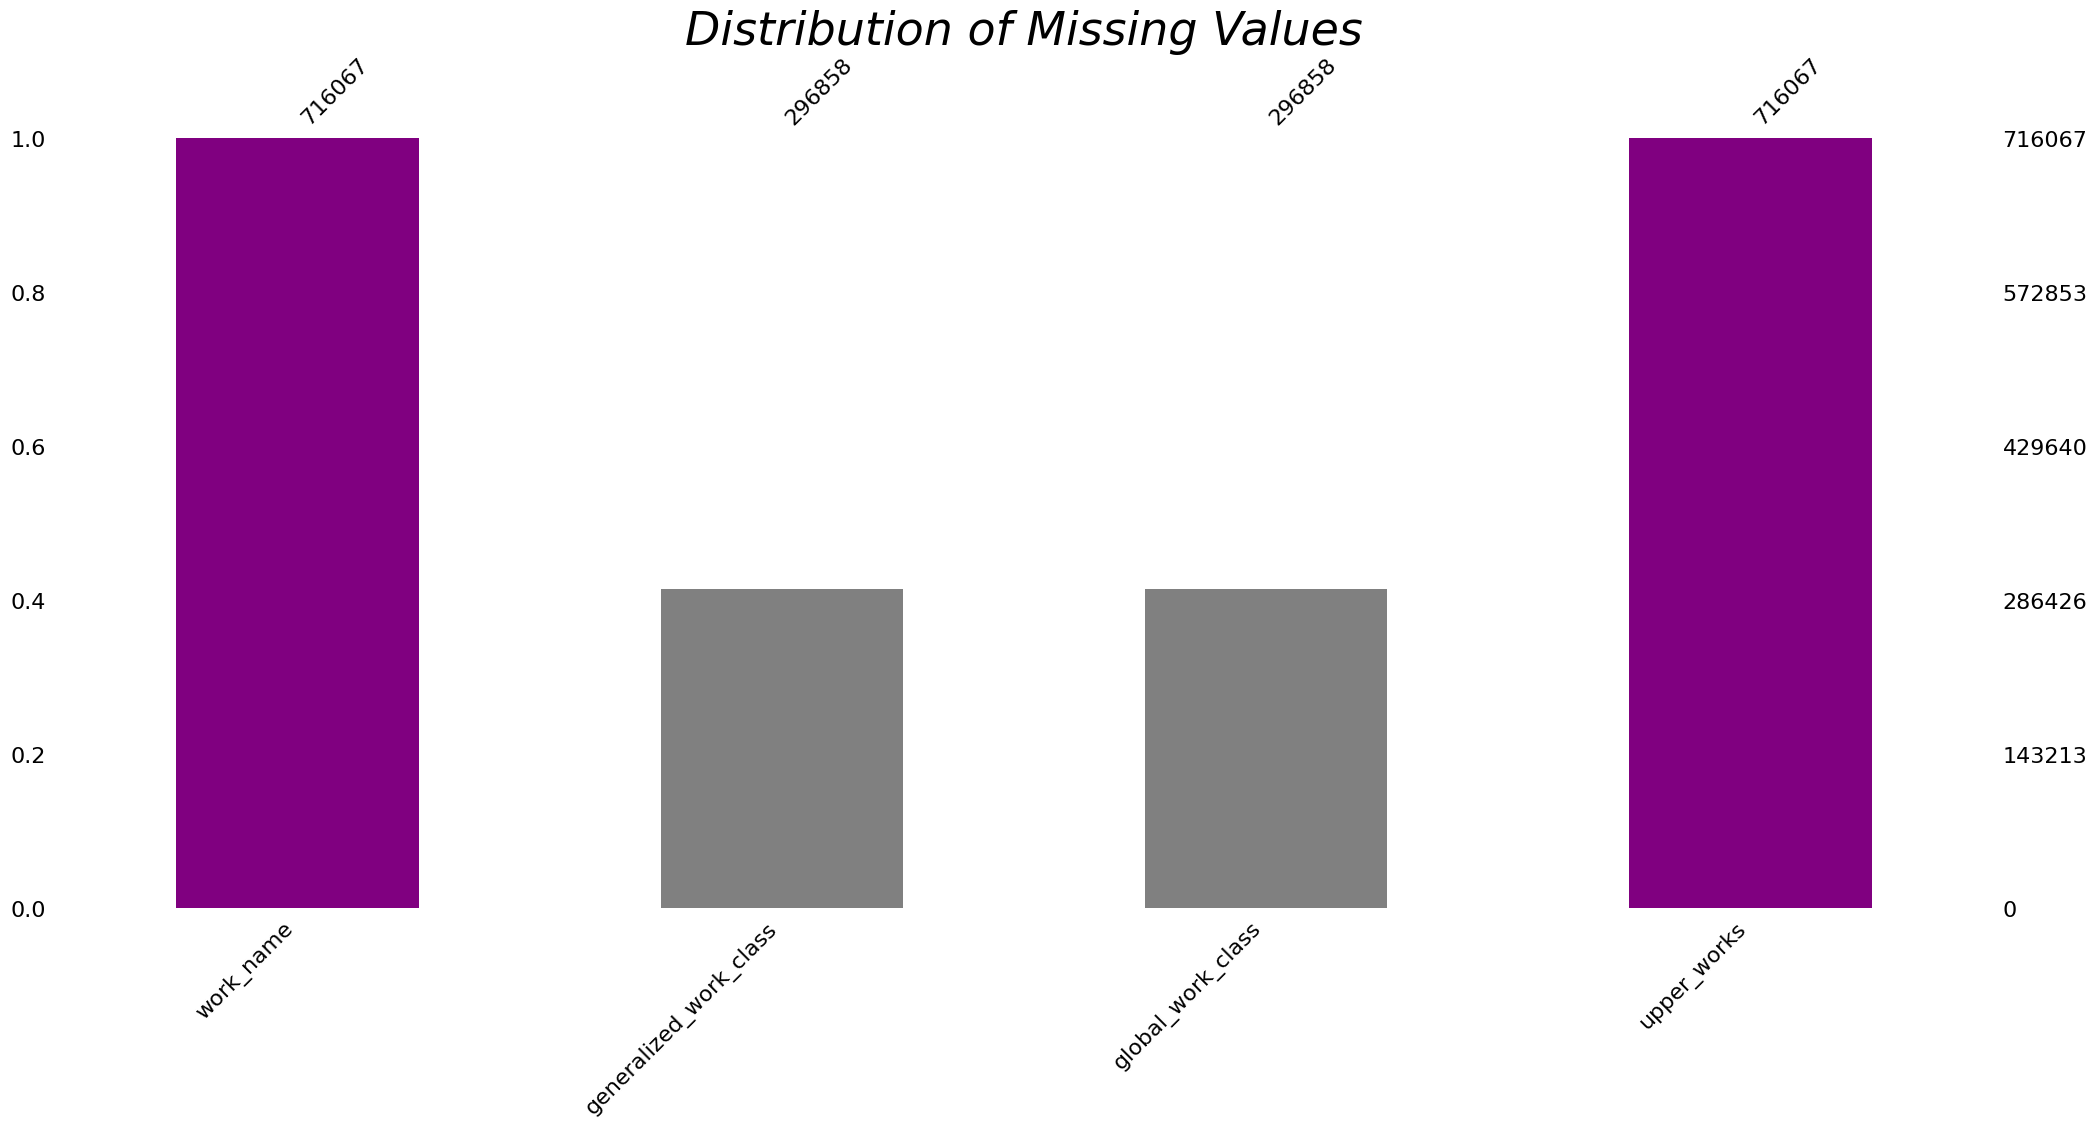

In [ ]:
# Define the color list
colors = ['purple' if col in ['work_name', 'upper_works'] else 'grey' for col in data.columns]

msno.bar(data, color=colors)
plt.title('Distribution of Missing Values', fontsize=33, fontstyle='oblique')
plt.show()

In [ ]:
# Function to preprocess the text
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower(), language='russian')
    # Remove punctuation and stop words
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(tokens)

In [ ]:
# Apply preprocessing to the 'work_name' and 'upper_works' column
data['processed_work_name'] = data['work_name'].apply(preprocess_text)
data['processed_upper_works'] = data['upper_works'].apply(preprocess_text)

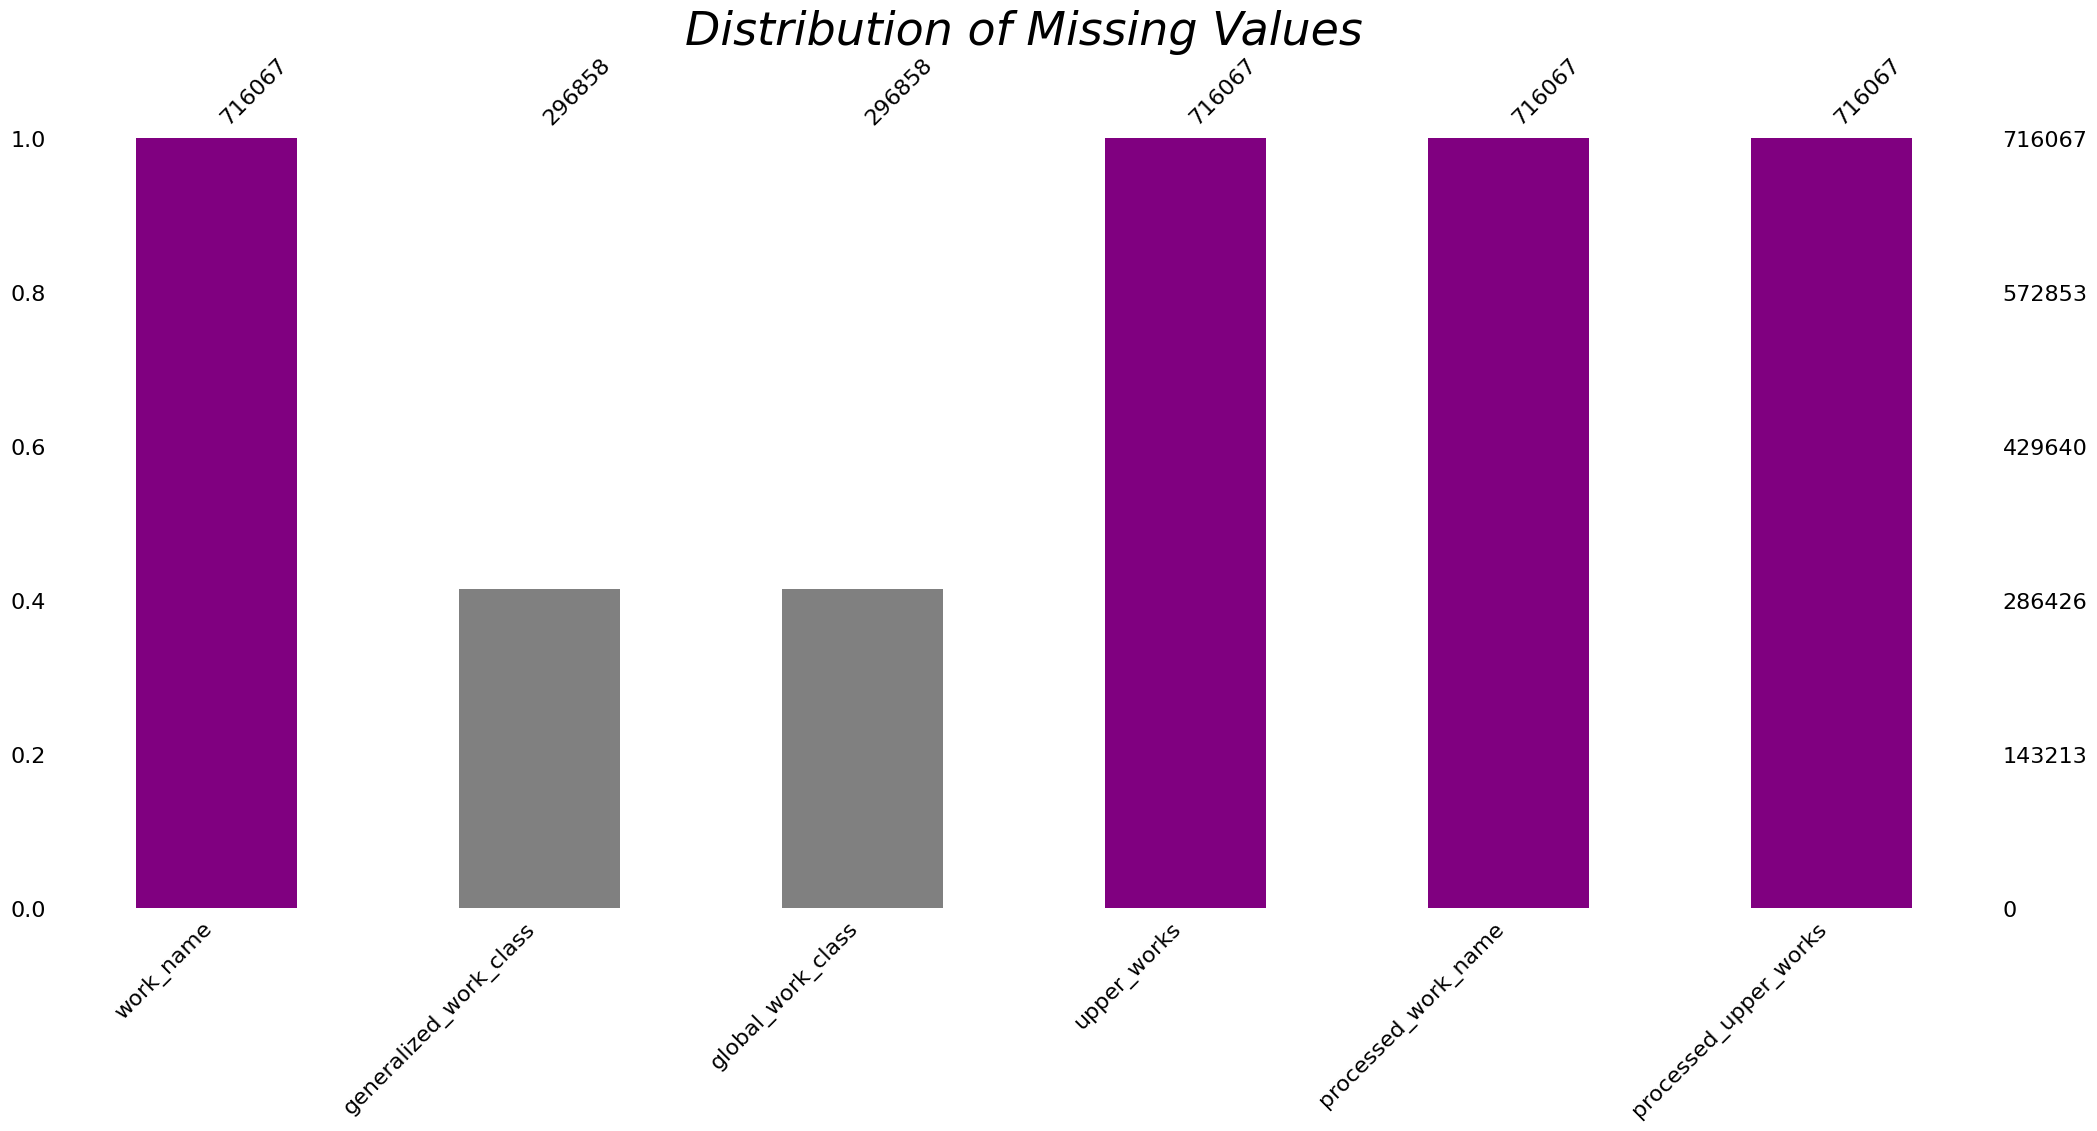

In [ ]:
# Define the color list
colors = ['grey' if col in ['generalized_work_class', 'global_work_class'] else 'purple' for col in data.columns]

msno.bar(data, color=colors)
plt.title('Distribution of Missing Values', fontsize=33, fontstyle='oblique')
plt.show()

# TF-IDF vectorizers

> We'll proceed with TF-IDF vectorization for both processed_work_name and processed_upper_works. This method will convert the text data into numerical format, creating a feature vector for each entry. The TF-IDF vectorizer will consider the frequency of each term in the documents as well as the inverse frequency of the term in the entire dataset, which helps to give more weight to the terms that are more unique and descriptive.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

# Initialize TF-IDF vectorizers
vectorizer_work_name = TfidfVectorizer(max_features=5000)
vectorizer_upper_works = TfidfVectorizer(max_features=5000)

# Fit and transform the vectorizers on the processed text data
tfidf_work_name = vectorizer_work_name.fit_transform(data['processed_work_name'])
tfidf_upper_works = vectorizer_upper_works.fit_transform(data['processed_upper_works'])

# Combine the two TF-IDF feature matrices
combined_tfidf_features = hstack([tfidf_work_name, tfidf_upper_works])

# Convert the combined TF-IDF feature matrix to CSR format
combined_tfidf_features_csr = combined_tfidf_features.tocsr()

# Display the shape of the combined TF-IDF feature matrix
combined_tfidf_features_csr.shape



(716067, 5015)

# Model Training - Generalized Work Class

> For the initial model, we can use a simple and interpretable classifier, like a Random Forest or Logistic Regression, to establish a baseline performance.  Later, we can explore more sophisticated models.

In [ ]:
# Let's train the initial model for generalized_work_class

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# Filter rows where 'generalized_work_class' is not missing
trainable_data = data[~data['generalized_work_class'].isnull()]

# Get the corresponding rows from the combined TF-IDF feature matrix
# Give me all the columns (i.e., all the TF-IDF scores) for the rows specified in trainable_indices.
trainable_features = combined_tfidf_features_csr[trainable_data.index, :]


In [ ]:
# Find the class(es) with only one member in 'generalized_work_class'
class_counts = trainable_data['generalized_work_class'].value_counts()
singleton_classes = class_counts[class_counts == 1]

# Display the singleton class(es)
singleton_classes

singleton_classes_df = pd.DataFrame(singleton_classes)

singleton_classes_df

,generalized_work_class
Изготовление кронштейнов,1
Монтаж стен,1
Изготовление нащельников кровли,1


In [ ]:
# Remove samples associated with singleton classes
filtered_trainable_data = trainable_data[~trainable_data['generalized_work_class'].isin(singleton_classes.index)]

# Get the corresponding rows from the combined TF-IDF feature matrix
filtered_trainable_features = combined_tfidf_features_csr[filtered_trainable_data.index, :]


In [ ]:
# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    filtered_trainable_features, filtered_trainable_data['generalized_work_class'],
    test_size=0.2, random_state=42, stratify=filtered_trainable_data['generalized_work_class'])


In [ ]:
# Initialize and train a Logistic Regression classifier
lr_classifier = LogisticRegression(max_iter=1000, random_state=42)
lr_classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
import joblib

# Save the model to a file
# joblib.dump(lr_classifier, 'logistic_regression_model.joblib')

In [ ]:
# Predictions and evaluation on the testing set
y_pred = lr_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, labels=lr_classifier.classes_)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


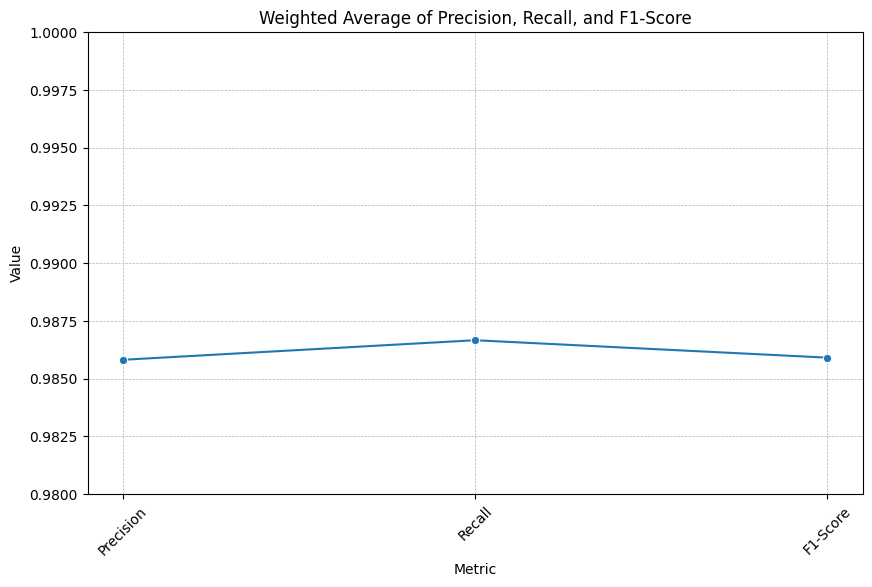

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
import seaborn as sns

# Calculate precision, recall, f1-score, and support per class
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, labels=lr_classifier.classes_)

# Create a DataFrame to display per-class metrics
class_report_df = pd.DataFrame({
    'Class': lr_classifier.classes_,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': fscore,
    'Support': support
})

# Calculate the weighted average of the metrics
lg_general_average_precision = np.average(class_report_df['Precision'], weights=class_report_df['Support'])
lg_general_aaverage_recall = np.average(class_report_df['Recall'], weights=class_report_df['Support'])
lg_general_aaverage_f1 = np.average(class_report_df['F1-Score'], weights=class_report_df['Support'])

# Create a DataFrame for visualization
lg_general_average_metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score'],
    'Value': [lg_general_average_precision, lg_general_aaverage_recall, lg_general_aaverage_f1]
})

plt.figure(figsize=(10, 6))
sns.lineplot(x='Metric', y='Value', data=lg_general_average_metrics_df, marker="o")
plt.ylim(0.98, 1.0)
plt.title('Weighted Average of Precision, Recall, and F1-Score')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.show()




# class_report_df.to_csv('classification_report.csv', index=False)


In [ ]:
class_report_df

,Class,Precision,Recall,F1-Score,Support
0,АКЗ мк,0.980952,0.880342,0.927928,117
1,АКЗ резервуара,1.000000,0.944444,0.971429,54
2,АКЗ свай,0.985662,0.963003,0.974201,2784
3,АКЗ трубопровода,0.968937,0.971054,0.969995,1831
4,"Автоматизация, монтаж",1.000000,0.608696,0.756757,23
...,...,...,...,...,...
199,Укладка георешетки,0.977778,0.977778,0.977778,45
200,Укладка геотекстиля,1.000000,0.842105,0.914286,19
201,Укладка гидроизоляции,1.000000,1.000000,1.000000,33
202,Укрепление откосов,1.000000,1.000000,1.000000,92


> The classification report you provided shows promising results for the Logistic Regression model on the generalized_work_class target variable:

> Overall Accuracy: The model achieves an overall accuracy of approximately 98.66%, which is quite high. This metric represents the proportion of correct predictions among the total number of cases evaluated.

> Precision, Recall, and F1-Score: The per-class metrics also show strong performance. Precision is consistently high for most classes, indicating that the model has a low rate of false positives. Recall is also high for many classes, which means the model successfully identifies a high proportion of actual positives for those classes. The F1-Score, which balances precision and recall, is also high for most classes.

> Support: The Support column shows the number of actual occurrences of each class in the specified dataset. It’s crucial to look at support because classes with low support (few occurrences) might have inflated metrics simply because there are fewer samples to predict.

In [ ]:
# Calculating weighted average precision, recall, and F1-score
precision_logistic_general_weighted, recall_logistic_general_weighted, fscore_logistic_general_weighted, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

# Displaying the metrics
print(f'Weighted Precision (General, Logistic Regression): {precision_logistic_general_weighted:.4f}')
print(f'Weighted Recall (General, Logistic Regression): {recall_logistic_general_weighted:.4f}')
print(f'Weighted F1 Score (General, Logistic Regression): {fscore_logistic_general_weighted:.4f}')

Weighted Precision (General, Logistic Regression): 0.9858
Weighted Recall (General, Logistic Regression): 0.9867
Weighted F1 Score (General, Logistic Regression): 0.9859


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Model Training - Global Work Class

In [ ]:
# Filter rows where 'global_work_class' is not missing
trainable_data_global = data[~data['global_work_class'].isnull()]

In [ ]:
# Find the class(es) with only one member in 'global_work_class'
class_counts_global = trainable_data_global['global_work_class'].value_counts()
singleton_classes_global = class_counts_global[class_counts_global == 1]

In [ ]:
# Display the singleton class(es)
singleton_classes_global

Series([], Name: global_work_class, dtype: int64)

> There are no singleton classes in the global_work_class target variable, which is great as it simplifies the process. Now we can proceed to the next steps:

In [ ]:
# Get the corresponding rows from the combined TF-IDF feature matrix for global_work_class
trainable_features_global = combined_tfidf_features_csr[trainable_data_global.index, :]


In [ ]:
# Split the data into training and testing sets with stratification for global_work_class
X_train_global, X_test_global, y_train_global, y_test_global = train_test_split(
    trainable_features_global, trainable_data_global['global_work_class'],
    test_size=0.2, random_state=42, stratify=trainable_data_global['global_work_class'])


In [ ]:
# Initialize and train a Logistic Regression classifier for global_work_class
lr_classifier_global = LogisticRegression(max_iter=1000, random_state=42)
lr_classifier_global.fit(X_train_global, y_train_global)


LogisticRegression(max_iter=1000, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


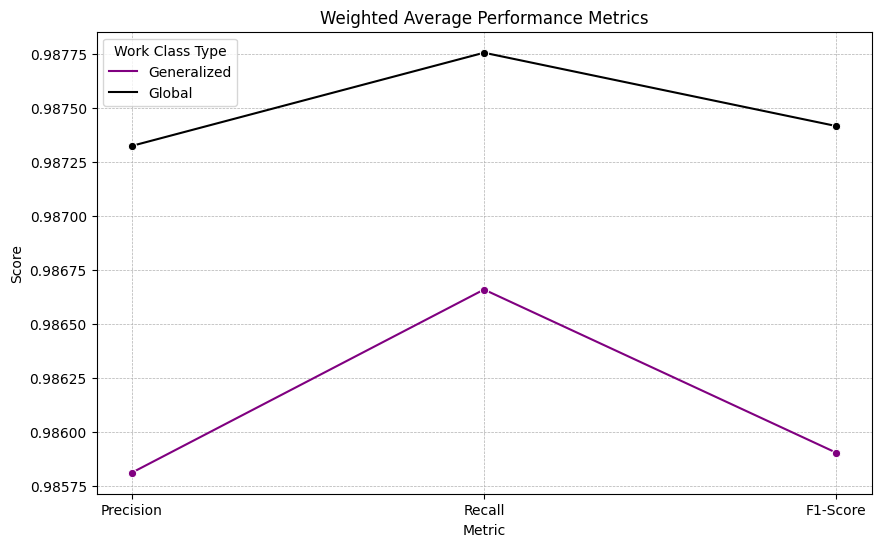

In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
import pandas as pd
import joblib

# Predictions on the testing set for global_work_class
y_pred_global = lr_classifier_global.predict(X_test_global)

# Calculate precision, recall, f1-score, and support
precision_global, recall_global, fscore_global, support_global = precision_recall_fscore_support(y_test_global, y_pred_global, labels=lr_classifier_global.classes_)

# Create a DataFrame to display the classification report
class_report_df_global = pd.DataFrame({
    'Class': lr_classifier_global.classes_,
    'Precision': precision_global,
    'Recall': recall_global,
    'F1-Score': fscore_global,
    'Support': support_global
})


# Calculate the weighted average of the metrics
lg_global_average_precision = np.average(class_report_df_global['Precision'], weights=class_report_df_global['Support'])
lg_global_aaverage_recall = np.average(class_report_df_global['Recall'], weights=class_report_df_global['Support'])
lg_global_aaverage_f1 = np.average(class_report_df_global['F1-Score'], weights=class_report_df_global['Support'])


# Create a combined DataFrame
combined_metrics_df = pd.concat([
    pd.DataFrame({
        'Metric': ['Precision', 'Recall', 'F1-Score'],
        'Value': [lg_general_average_precision, lg_general_aaverage_recall, lg_general_aaverage_f1],
        'Class': 'Generalized'
    }),
    pd.DataFrame({
        'Metric': ['Precision', 'Recall', 'F1-Score'],
        'Value': [lg_global_average_precision, lg_global_aaverage_recall, lg_global_aaverage_f1],
        'Class': 'Global'
    })
])


# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_metrics_df, x='Metric', y='Value', hue='Class', marker='o', palette={'Generalized':'purple', 'Global':'black'})
plt.title('Weighted Average Performance Metrics')
plt.ylabel('Score')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title='Work Class Type')
# plt.ylim(0.98, 0.99)
plt.show()

> Overall Accuracy: The overall accuracy is approximately
98.78%, which is excellent. This means that the model correctly predicts the global work class for about 98.78% of the tasks in the test set.

> Precision, Recall, and F1-Score:

1. The per-class precision is generally very high, with many classes having a precision of 1.0 or close to it. Precision measures the ratio of correctly predicted positive observations to the total predicted positives. High precision relates to the low false positive rate.

2. Recall (Sensitivity) - Most classes have very high recall as well. Recall calculates the ratio of correctly predicted positive observations to the all observations in actual class.

3. The F1-Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. It is a good way to show that a classifer has a good value for both recall and precision. Many classes have an F1-Score close to 1.0, which is ideal.

> Support: The support is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may result in an imbalanced classifier, so it's important to look at the support of each class.

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

# Calculating Logistic Regression weighted average precision, recall, and F1-score
precision_logistic_global_weighted, recall_logistic_global_weighted, fscore_logistic_global_weighted, _ = precision_recall_fscore_support(y_test_global, y_pred_global, average='weighted')

# Displaying the metrics
print(f'Weighted Precision (Global, Logistic Regression): {precision_logistic_global_weighted:.4f}')
print(f'Weighted Recall (Global, Logistic Regression): {recall_logistic_global_weighted:.4f}')
print(f'Weighted F1 Score (Global, Logistic Regression): {fscore_logistic_global_weighted:.4f}')

Weighted Precision (Global, Logistic Regression): 0.9873
Weighted Recall (Global, Logistic Regression): 0.9878
Weighted F1 Score (Global, Logistic Regression): 0.9874


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# SVM Model - global & general work class

In [ ]:
from sklearn.svm import SVC

In [ ]:
# Initialize an SVM classifier
svm_classifier_global = SVC(kernel='linear', random_state=42)

# Train the SVM classifier for global_work_class
svm_classifier_global.fit(X_train_global, y_train_global)


SVC(kernel='linear', random_state=42)

In [ ]:
# Predictions on the testing set for global_work_class
y_pred_svm_global = svm_classifier_global.predict(X_test_global)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


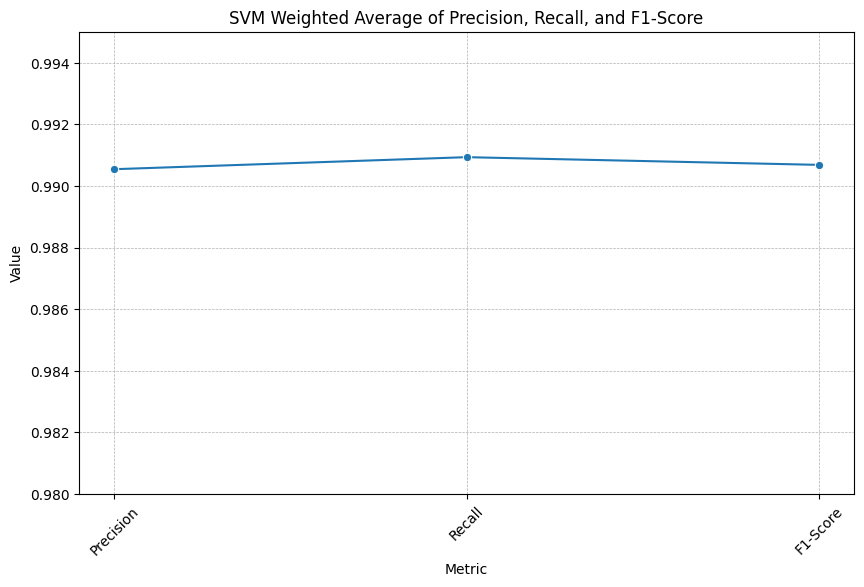

In [ ]:
# Calculate precision, recall, f1-score, and support
precision_svm_global, recall_svm_global, fscore_svm_global, support_svm_global = precision_recall_fscore_support(y_test_global, y_pred_svm_global, labels=svm_classifier_global.classes_)

# Create a DataFrame to display the classification report
class_report_df_svm_global = pd.DataFrame({
    'Class': svm_classifier_global.classes_,
    'Precision': precision_svm_global,
    'Recall': recall_svm_global,
    'F1-Score': fscore_svm_global,
    'Support': support_svm_global
})


# Calculate the weighted average of the metrics
svm_global_average_precision = np.average(class_report_df_svm_global['Precision'], weights=class_report_df_svm_global['Support'])
svm_global_aaverage_recall = np.average(class_report_df_svm_global['Recall'], weights=class_report_df_svm_global['Support'])
svm_global_aaverage_f1 = np.average(class_report_df_svm_global['F1-Score'], weights=class_report_df_svm_global['Support'])

# Create a DataFrame for visualization
svm_general_average_metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score'],
    'Value': [svm_global_average_precision, svm_global_aaverage_recall, svm_global_aaverage_f1]
})

plt.figure(figsize=(10, 6))
sns.lineplot(x='Metric', y='Value', data=svm_general_average_metrics_df, marker="o")
plt.ylim(0.98, 0.995)
plt.title('SVM Weighted Average of Precision, Recall, and F1-Score')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.show()




In [ ]:
from sklearn.metrics import precision_recall_fscore_support

# Calculating weighted average precision, recall, and F1-score
precision_svm_global_weighted, recall_svm_global_weighted, fscore_svm_global_weighted, _ = precision_recall_fscore_support(y_test_global, y_pred_svm_global, average='weighted')

# Displaying the metrics
print(f'Weighted Precision (Global, SVM): {precision_svm_global_weighted:.4f}')
print(f'Weighted Recall (Global, SVM): {recall_svm_global_weighted:.4f}')
print(f'Weighted F1 Score (Global, SVM): {fscore_svm_global_weighted:.4f}')

Weighted Precision (Global, SVM): 0.9905
Weighted Recall (Global, SVM): 0.9909
Weighted F1 Score (Global, SVM): 0.9907


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Let's work on general work class**

In [ ]:
# Initialize an SVM classifier
svm_classifier_general = SVC(kernel='linear', random_state=42)

# Train the SVM classifier for generalized_work_class
svm_classifier_general.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
# Predictions on the testing set for generalized_work_class
y_pred_svm_general = svm_classifier_general.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


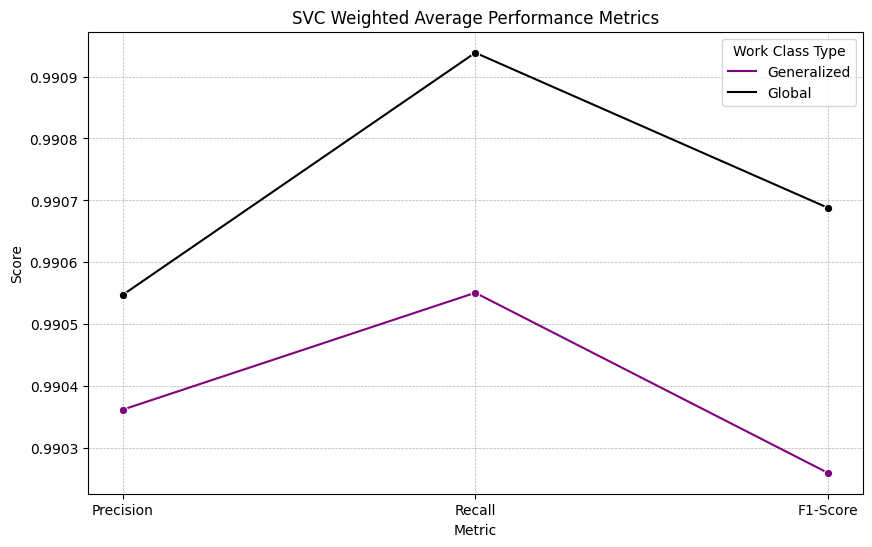

In [ ]:
# Calculate precision, recall, f1-score, and support
precision_svm_general, recall_svm_general, fscore_svm_general, support_svm_general = precision_recall_fscore_support(y_test, y_pred_svm_general, labels=svm_classifier_general.classes_)

# Create a DataFrame to display the classification report
class_report_df_svm_general = pd.DataFrame({
    'Class': svm_classifier_general.classes_,
    'Precision': precision_svm_general,
    'Recall': recall_svm_general,
    'F1-Score': fscore_svm_general,
    'Support': support_svm_general
})

# Calculate the weighted average of the metrics
svm_general_average_precision = np.average(class_report_df_svm_general['Precision'], weights=class_report_df_svm_general['Support'])
svm_general_aaverage_recall = np.average(class_report_df_svm_general['Recall'], weights=class_report_df_svm_general['Support'])
svm_general_aaverage_f1 = np.average(class_report_df_svm_general['F1-Score'], weights=class_report_df_svm_general['Support'])


# Create a combined DataFrame
combined_metrics_df = pd.concat([
    pd.DataFrame({
        'Metric': ['Precision', 'Recall', 'F1-Score'],
        'Value': [svm_general_average_precision, svm_general_aaverage_recall, svm_general_aaverage_f1],
        'Class': 'Generalized'
    }),
    pd.DataFrame({
        'Metric': ['Precision', 'Recall', 'F1-Score'],
        'Value': [svm_global_average_precision, svm_global_aaverage_recall, svm_global_aaverage_f1],
        'Class': 'Global'
    })
])


# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_metrics_df, x='Metric', y='Value', hue='Class', marker='o', palette={'Generalized':'purple', 'Global':'black'})
plt.title('SVC Weighted Average Performance Metrics')
plt.ylabel('Score')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title='Work Class Type')
# plt.ylim(0.98, 0.99)
plt.show()



In [ ]:
from sklearn.metrics import precision_recall_fscore_support

# Calculating weighted average precision, recall, and F1-score
precision_svm_general_weighted, recall_svm_general_weighted, fscore_svm_general_weighted, _ = precision_recall_fscore_support(y_test, y_pred_svm_general, average='weighted')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import precision_recall_fscore_support

# Displaying the metrics
print(f'Weighted Precision (General, SVM): {precision_svm_general_weighted:.4f}')
print(f'Weighted Recall (General, SVM): {recall_svm_general_weighted:.4f}')
print(f'Weighted F1 Score (General, SVM): {fscore_svm_general_weighted:.4f}')

Weighted Precision (General, SVM): 0.9904
Weighted Recall (General, SVM): 0.9906
Weighted F1 Score (General, SVM): 0.9903


# Neural Network

In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from sklearn.neural_network import MLPClassifier



In [ ]:
# Initialize a Neural Network classifier
nn_classifier_general = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

# Train the Neural Network classifier for general_work_class
nn_classifier_general.fit(X_train, y_train)


MLPClassifier(max_iter=500, random_state=42)

In [ ]:
# Predictions on the testing set for general_work_class
y_pred_nn_general = nn_classifier_general.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


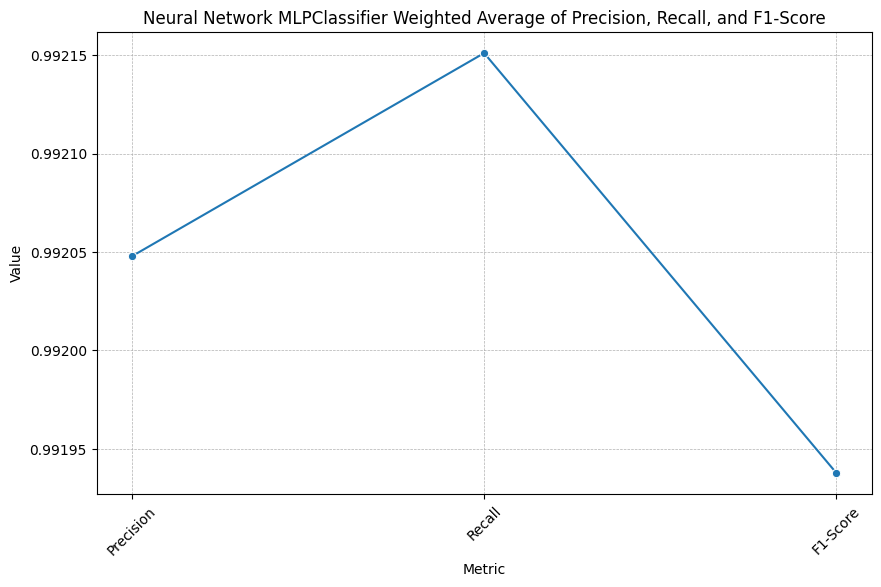

In [ ]:
# Calculate precision, recall, f1-score, and support
precision_nn_general, recall_nn_general, fscore_nn_general, support_nn_general = precision_recall_fscore_support(y_test, y_pred_nn_general, labels=nn_classifier_general.classes_)

# Create a DataFrame to display the classification report
class_report_df_nn_general = pd.DataFrame({
    'Class': nn_classifier_general.classes_,
    'Precision': precision_nn_general,
    'Recall': recall_nn_general,
    'F1-Score': fscore_nn_general,
    'Support': support_nn_general
})

# Calculate the weighted average of the metrics
nn_general_average_precision = np.average(class_report_df_nn_general['Precision'], weights=class_report_df_nn_general['Support'])
nn_general_aaverage_recall = np.average(class_report_df_nn_general['Recall'], weights=class_report_df_nn_general['Support'])
nn_general_average_f1 = np.average(class_report_df_nn_general['F1-Score'], weights=class_report_df_nn_general['Support'])

# Create a DataFrame for visualization
svm_general_average_metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score'],
    'Value': [nn_general_average_precision, nn_general_aaverage_recall, nn_general_average_f1]
})

plt.figure(figsize=(10, 6))
sns.lineplot(x='Metric', y='Value', data=svm_general_average_metrics_df, marker="o")
# plt.ylim(0.98, 0.995)
plt.title('Neural Network MLPClassifier Weighted Average of Precision, Recall, and F1-Score')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.show()



In [ ]:
# Calculating weighted average precision, recall, and F1-score
precision_nn_general_weighted, recall_nn_general_weighted, f1_score_nn_general_weighted, _ = precision_recall_fscore_support(y_test, y_pred_nn_general, average='weighted')


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import precision_recall_fscore_support

# Displaying the metrics
print(f'Weighted Precision (General, Neural Network): {precision_nn_general_weighted:.4f}')
print(f'Weighted Recall (General, Neural Network): {recall_nn_general_weighted:.4f}')
print(f'Weighted F1 Score (General, Neural Network): {f1_score_nn_general_weighted:.4f}')


Weighted Precision (General, Neural Network): 0.9920
Weighted Recall (General, Neural Network): 0.9922
Weighted F1 Score (General, Neural Network): 0.9919


**Let's do same for global work class**

In [ ]:
# Initialize a Neural Network classifier
nn_classifier_global = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

# Train the Neural Network classifier for global_work_class
nn_classifier_global.fit(X_train_global, y_train_global)

In [ ]:
# Predictions on the testing set for global_work_class
y_pred_nn_global = nn_classifier_global.predict(X_test_global)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


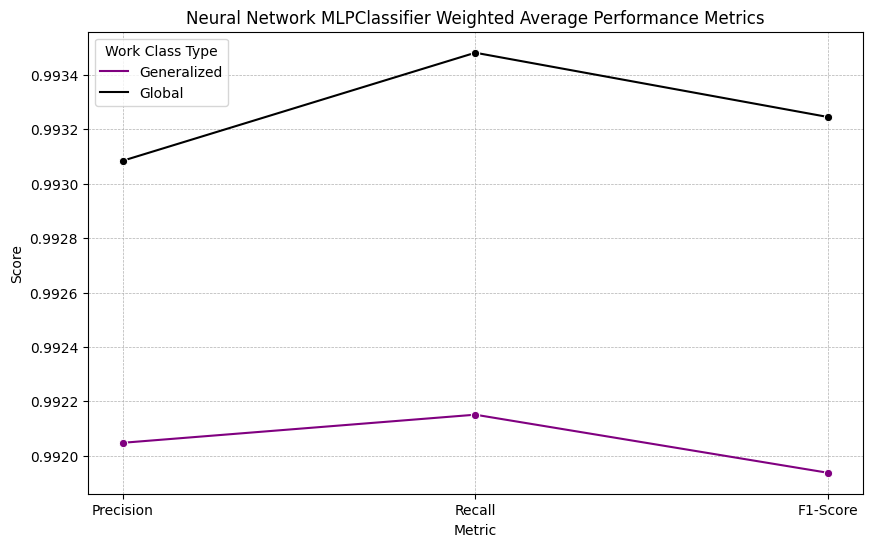

In [ ]:
# Calculate precision, recall, f1-score, and support
precision_nn_global, recall_nn_global, fscore_nn_global, support_nn_global = precision_recall_fscore_support(y_test_global, y_pred_nn_global, labels=nn_classifier_global.classes_)

# Create a DataFrame to display the classification report
class_report_df_nn_global = pd.DataFrame({
    'Class': nn_classifier_global.classes_,
    'Precision': precision_nn_global,
    'Recall': recall_nn_global,
    'F1-Score': fscore_nn_global,
    'Support': support_nn_global
})

# Calculate the weighted average of the metrics
nn_global_average_precision = np.average(class_report_df_nn_global['Precision'], weights=class_report_df_nn_global['Support'])
nn_global_average_recall = np.average(class_report_df_nn_global['Recall'], weights=class_report_df_nn_global['Support'])
nn_global_average_f1 = np.average(class_report_df_nn_global['F1-Score'], weights=class_report_df_nn_global['Support'])


# Create a combined DataFrame
combined_metrics_df = pd.concat([
    pd.DataFrame({
        'Metric': ['Precision', 'Recall', 'F1-Score'],
        'Value': [nn_general_average_precision, nn_general_aaverage_recall, nn_general_average_f1],
        'Class': 'Generalized'
    }),
    pd.DataFrame({
        'Metric': ['Precision', 'Recall', 'F1-Score'],
        'Value': [nn_global_average_precision, nn_global_average_recall, nn_global_average_f1],
        'Class': 'Global'
    })
])


# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_metrics_df, x='Metric', y='Value', hue='Class', marker='o', palette={'Generalized':'purple', 'Global':'black'})
plt.title('Neural Network MLPClassifier Weighted Average Performance Metrics')
plt.ylabel('Score')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title='Work Class Type')
# plt.ylim(0.98, 0.99)
plt.show()



In [ ]:
from sklearn.metrics import precision_recall_fscore_support

# Calculating weighted average precision, recall, and F1-score
precision_nn_global_weighted, recall_nn_global_weighted, f1_score_nn_global_weighted, _ = precision_recall_fscore_support(y_test_global, y_pred_nn_global, average='weighted')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Displaying the metrics
print(f'Weighted Precision (Global, Neural Network): {precision_nn_global_weighted:.4f}')
print(f'Weighted Recall (Global, Neural Network): {recall_nn_global_weighted:.4f}')
print(f'Weighted F1 Score (Global, Neural Network): {f1_score_nn_global_weighted:.4f}')

Weighted Precision (Global, Neural Network): 0.9931
Weighted Recall (Global, Neural Network): 0.9935
Weighted F1 Score (Global, Neural Network): 0.9932


# Model Compare

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame to compare the models' performance
model_names = ["Logistic Regression", "SVM", "Neural Network MLPClassifier"]
global_precisions = [lg_global_aaverage_f1, svm_global_aaverage_f1, nn_global_average_f1]
general_precisions = [lg_general_aaverage_f1, svm_general_aaverage_f1, nn_general_average_f1]

comparison_df = pd.DataFrame({
    "Model": model_names,
    "Generalized Work Class Precision": general_precisions,
    "Global Work Class Precision": global_precisions
})

plt.figure(figsize=(10, 6))
plt.plot(comparison_df["Model"], comparison_df["Generalized Work Class Precision"], marker='o', label='Generalized Work Class Precision', color='purple')
plt.plot(comparison_df["Model"], comparison_df["Global Work Class Precision"], marker='o', label='Global Work Class Precision', color='black')
plt.title('Model F1 Score Comparison')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.ylim(0.98, 1.0)  # Adjusting y-axis to zoom in on differences
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
